In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

# Unsupervised Learning


Many instances of unsupervised learning, such as dimensionality reduction, manifold learning and feature extraction, find a new representation of the input data without any additional input.

<img src="figures/unsupervised_workflow.svg" width="100%">

The most simple example of this, which can barely be called learning, is rescaling the data to have zero mean and unit variance. This is a helpful preprocessing step for many machine learning models.

Applying such a preprocessing has a very similar interface to the supervised learning algorithms we saw so far.
Let's load the iris dataset and rescale it:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

(150, 4)


The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:


In [5]:
print("mean : %s " % X.mean(axis=0))
print("standard deviation : %s " % X.std(axis=0))

mean : [ 5.84333333  3.054       3.75866667  1.19866667] 
standard deviation : [ 0.82530129  0.43214658  1.75852918  0.76061262] 


To use a preprocessing method, we first import the estimator, here StandardScaler and instantiate it:
    

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

As with the classification and regression algorithms, we call ``fit`` to learn the model from the data. As this is an unsupervised model, we only pass ``X``, not ``y``. This simply estimates mean and standard deviation.

In [7]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can rescale our data by applying the ``transform`` (not ``predict``) method:

In [8]:
X_scaled = scaler.transform(X)

``X_scaled`` has the same number of samples and features, but the mean was subtracted and all features were scaled to have unit standard deviation:

In [9]:
print(X_scaled.shape)

(150, 4)


In [8]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15] 
standard deviation : [ 1.  1.  1.  1.] 


Principal Component Analysis
============================


An unsupervised transformation that is somewhat more interesting is Principle Component Analysis (PCA).
It is a technique to reduce the dimensionality of the data, by creating a linear projection.
That is, we find new features to represent the data that are a linear combination of the old data (i.e. we rotate it).

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. To illustrate how a rotation might look like, we first show it on two dimensional data and keep both principal components.

We create a Gaussian blob that is rotated:

In [9]:
from scipy import stats

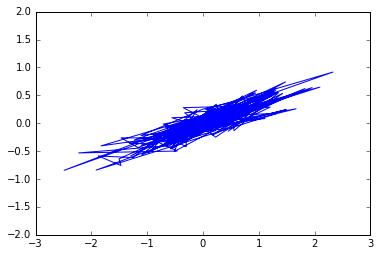

In [10]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], '-')
plt.axis('equal');

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


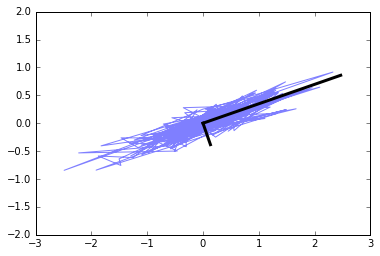

In [12]:
plt.plot(X[:, 0], X[:, 1], '-', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [13]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


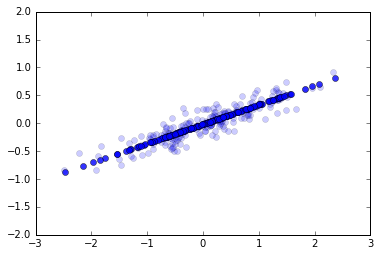

In [14]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

### Now try the above example with ``sklearn.decomposition.RandomizedPCA``.

You can re-use the plotting snippets from above.
Are the results similar to those from standard PCA?